In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

# General important stuff
import sys
sys.path.append('..')

import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from control_systems.control_core import *
from control_systems.calculate_laser_noise import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

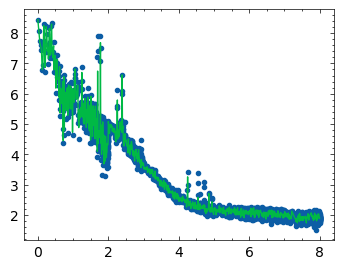

In [36]:
df = pd.read_csv('laserdata/ML_FN_data.csv')
FN = df.values
freqx = np.logspace(0,8,1000)
FNx = S_noise_interp(FN[:,0],FN[:,1],freqx, ifplot = 1)

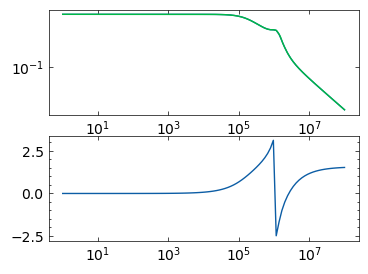

In [37]:
df = pd.read_csv('laserdata/ML_freqresp_data.csv')
df = df.values
freq = df[:,0]
H_laser = df[:,1]*np.exp(1j*df[:,2])
H_laser = ct.FrequencyResponseData(H_laser,2*np.pi*freq, smooth = True)
mag,phase,omega = H_laser.freqresp(2*np.pi*freqx)

plt.subplot(211)
plt.loglog(freq,df[:,1],freqx,mag)
plt.subplot(212)
plt.semilogx(freq,df[:,2]);